## Introduction

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| Required to import, and briefly discuss, the libraries that will be used throughout analysis and modelling. |

---

In [ ]:
# installing libraries
!pip install spacy
!pip install seaborn
!pip install wordcloud
!pip install emoji
!pip install pyspellchecker
!pip install ftfy

In [22]:
# Preprocessing libraries
import nltk
from nltk import FreqDist, bigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Data manipulation libraries
import numpy as np
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud

# Model training Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC

# Model evaluation libraries
from sklearn import metrics
from sklearn.metrics import f1_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# Library for saving models
import pickle



<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| Load the data from the `train and test` file into a DataFrame. |

---

In [23]:
# loading training dataset
df_train = pd.read_csv("train.csv") 

# loading testing dataset
df_test = pd.read_csv("test.csv")



<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| Perform an in-depth analysis of all the variables in the DataFrame. |

---


##### Reading the dataset

In [24]:
print(df_train.shape)
print(df_test.shape)

print(df_train.head(10), "\n")
print(df_test.head(10))

(15819, 3)
(10546, 2)
   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954
5          1  Worth a read whether you do or don't believe i...   425577
6          1  RT @thenation: Mike Pence doesn’t believe in g...   294933
7          1  RT @makeandmendlife: Six big things we can ALL...   992717
8          1  @AceofSpadesHQ My 8yo nephew is inconsolable. ...   664510
9          1  RT @paigetweedy: no offense… but like… how do ...   260471 

                                             message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c

In [25]:
#displays the number of rows and columns 
# df_train.shape
df_test.describe

<bound method NDFrame.describe of                                                  message  tweetid
0      Europe will now be looking to China to make su...   169760
1      Combine this with the polling of staffers re c...    35326
2      The scary, unimpeachable evidence that climate...   224985
3      @Karoli @morgfair @OsborneInk @dailykos \r\nPu...   476263
4      RT @FakeWillMoore: 'Female orgasms cause globa...   872928
...                                                  ...      ...
10541  RT @BrittanyBohrer: Brb, writing a poem about ...   895714
10542  2016: the year climate change came home: Durin...   875167
10543  RT @loop_vanuatu: Pacific countries positive a...    78329
10544  RT @xanria_00018: You’re so hot, you must be t...   867455
10545  RT @chloebalaoing: climate change is a global ...   470892

[10546 rows x 2 columns]>

In [6]:
''''
Displays info about the columns
'message' is categorical whereas
'tweetId' & 'sentiment' are numerical
'''
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


#### Converting the sentiments form number to words

In [31]:
# Convert sentiments from numbers to words
""" The followinng function takes the original dataframe as a parameter then create a copy of it and
then corverts the sentiments from numbers to words """

def update(df):
    df = df_train.copy()
    sentiment = df['sentiment']
    word_sentiment = []

    for i in sentiment :
        if i == 1 :
            word_sentiment.append('Pro')
        elif i == 0 :
            word_sentiment.append('Neutral')
        elif i == -1 :
            word_sentiment.append('Anti')
        else :
            word_sentiment.append('News')

    df['sentiment'] = word_sentiment
    
    return df

df_train = update(df_train)
df_train.head()

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


#### Check for duplicates

In [32]:
duplicate_tweets = round((1-(df_train['message'].nunique()/len(df_train['message'])))*100,2)
print('Duplicate tweets percentage:', duplicate_tweets,'%')

Duplicate tweets percentage: 10.05 %


The duplicates are caused by the retweets, So about 10,5 of the tweets in our dataset are Retweets(RT)

#### Check Number of tweets for each sentimenrt class

In [33]:
df_train['sentiment'].value_counts()

Pro        8530
News       3640
Neutral    2353
Anti       1296
Name: sentiment, dtype: int64

#### Check distribution of sentiments

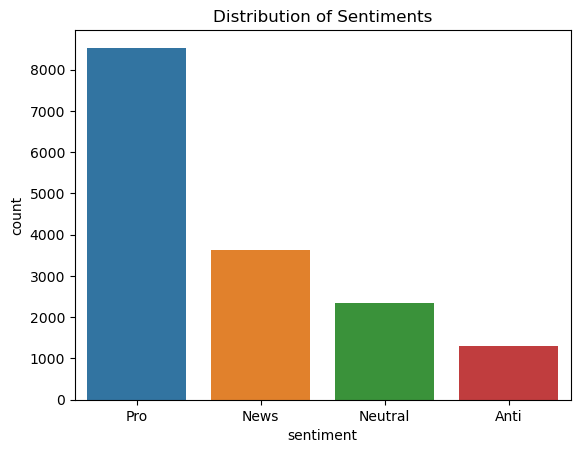

In [34]:
sns.countplot(x='sentiment', data=df_train)
plt.title('Distribution of Sentiments')
plt.show()


#### Proportion of tweets in each sentiment

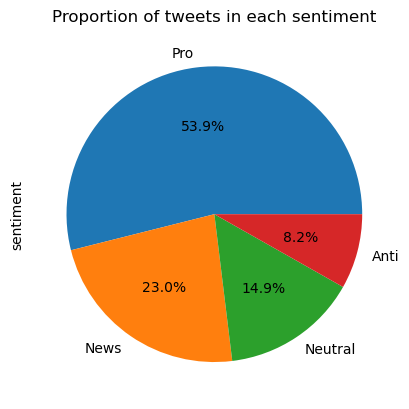

In [35]:
# Plot the proportion of tweets in each sentiment
perc = df_train['sentiment'].value_counts()
perc.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of tweets in each sentiment')

plt.show()

The proportion of tweets in each in each sentiment shows that the Pro climate change is the majority 

#### Tweet Data Analysis

1. Average length of tweets

In [36]:
# Analyze the characteristics of the tweet text
df_train['tweet_length'] = df_train['message'].apply(len)

2. Distribution of tweet length

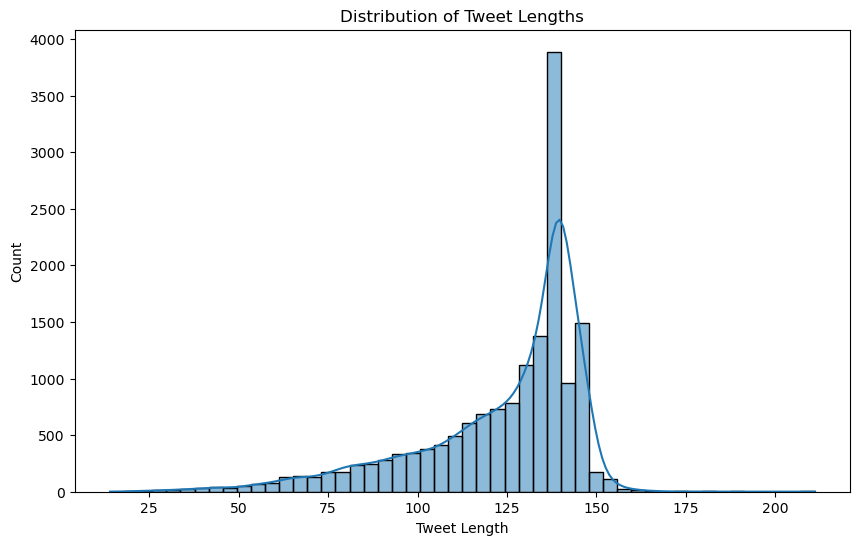

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['tweet_length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.show()

3. Common words and phrases

In [13]:
'''
Concatenates the all the tweets into a single string
and tokenises the text into individual words and
outputs the most common words & its frequencies
'''
all_text = ' '.join(df_train['message'].astype(str))

tokens = word_tokenize(all_text)
fdist = FreqDist(tokens)
common_words = fdist.most_common(10)
print("Common Words:", common_words)

bi_grams = list(bigrams(tokens))
bi_gram_freq = FreqDist(bi_grams)
common_bigrams = bi_gram_freq.most_common(10)
print("Common Bigrams:", common_bigrams)

Common Words: [(':', 22517), ('@', 14835), ('climate', 12607), ('change', 12330), ('https', 10001), ('RT', 9717), ('.', 7274), ('to', 7083), ('the', 6421), (',', 6152)]
Common Bigrams: [(('climate', 'change'), 12004), (('https', ':'), 10001), (('RT', '@'), 9616), (('global', 'warming'), 3287), (('change', '.'), 1389), (('change', 'https'), 1342), (('on', 'climate'), 1171), (('change', 'is'), 1166), (('.', 'https'), 1061), (('&', 'amp'), 940)]


4. WordCloud

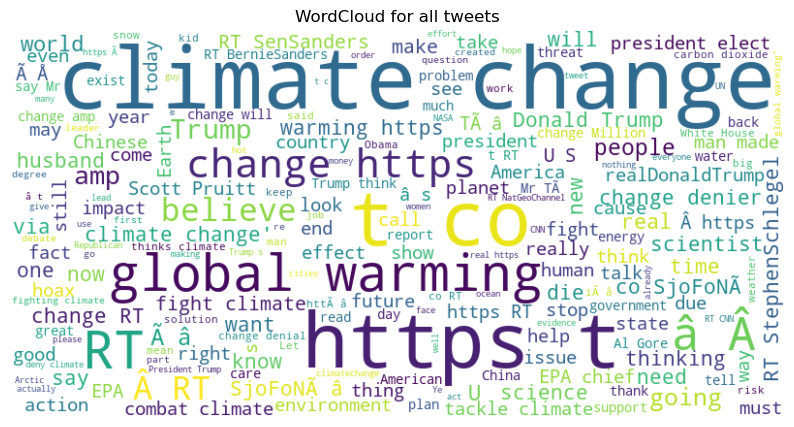

In [42]:
tweets = df_train['message'].values

if len(tweets) > 0:
    positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tweets))
    plt.figure(figsize=(10, 6))
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud for all tweets')
else:
    print('No tweets found.')


5. Verify for any null values

In [18]:
df_train.isnull().sum()
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| Clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [19]:
df_train.head()

,sentiment,message,tweetid,tweet_length
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,140
1,1,It's not like we lack evidence of anthropogeni...,126103,62
2,2,RT @RawStory: Researchers say we have three ye...,698562,140
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122


In [20]:
# Check for missing values
print("Missing values in df_train:\n", df_train.isnull().sum())
print("Missing values in df_test:\n", df_test.isnull().sum())

Missing values in df_train:
 sentiment       0
message         0
tweetid         0
tweet_length    0
dtype: int64
Missing values in df_test:
 message    0
tweetid    0
dtype: int64


In [ ]:
print(df_test.info)

In [21]:
# Function to clean the message column
def clean_text(text):
    # Remove mentions (@user), URLs, and special characters
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    
    text = text.lower()
    
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_text = [word for word in tokens]
    
    # Join the filtered words back into a sentence
    text = ' '.join(filtered_text)
    return text



In [17]:
# Splitting out the X from the target
y = df_train['sentiment']
X = df_train['message']

# Turning text into something your model can read
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words ="english")
X_vectorized = vectorizer.fit_transform(X)


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| Create one or more classification models that are able to accurately predict |

---

In [18]:
# splitting the training data into a training set and a validation set
from sklearn.model_selection import train_test_split


X_train,X_val,y_train,y_val = train_test_split(X_vectorized,y,test_size=.3,shuffle=True, stratify=y, random_state=11)

In [39]:
# training the model and evaluating using the evaluation set
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_val)

In [1]:
# Linear regression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_val)

NameError: name 'LogisticRegression' is not defined

In [41]:
# Linear SVC
lsvc = LinearSVC(class_weight='balanced')
lsvc.fit(X_train, y_train)
lsvc_pred = lsvc.predict(X_val)

In [46]:
# K - nearest neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_val)

In [44]:
# Niave bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_val)

In [47]:
# checking the perfomance of our model on the validations
f1_score(y_val, knn_pred, average="macro")

0.5623251730445487

In [23]:
# Getting our test ready

testx = df_test['message']
test_vect = vectorizer.transform(testx)

In [24]:
# Making predictions on the test set and adding sentiment column to our original test df
y_pred = rfc.predict(test_vect)

In [25]:
# Making predictions on the test set and adding a sentiment column to our original test df

y_pred = rfc.predict(test_vect)


In [26]:
y_pred

array(['Pro', 'Pro', 'Pro', ..., 'Pro', 'Neutral', 'Pro'], dtype=object)

In [27]:
df_test['sentiment'] = y_pred
df_test.head

<bound method NDFrame.head of                                                  message  tweetid sentiment
0      Europe will now be looking to China to make su...   169760       Pro
1      Combine this with the polling of staffers re c...    35326       Pro
2      The scary, unimpeachable evidence that climate...   224985       Pro
3      @Karoli @morgfair @OsborneInk @dailykos \r\nPu...   476263       Pro
4      RT @FakeWillMoore: 'Female orgasms cause globa...   872928   Neutral
...                                                  ...      ...       ...
10541  RT @BrittanyBohrer: Brb, writing a poem about ...   895714       Pro
10542  2016: the year climate change came home: Durin...   875167       Pro
10543  RT @loop_vanuatu: Pacific countries positive a...    78329       Pro
10544  RT @xanria_00018: You’re so hot, you must be t...   867455   Neutral
10545  RT @chloebalaoing: climate change is a global ...   470892       Pro

[10546 rows x 3 columns]>

In [28]:
df_test[['tweetid','sentiment']].to_csv('submission.csv', index =False)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| Compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---